In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train (1).csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
df.dtypes

,0
Survived,int64
Age,float64
Fare,float64


In [ ]:
x_train['Age_Imputed'] = x_train['Age']
x_test['Age_Imputed'] = x_test['Age']

In [ ]:
x_train

,Age,Fare,Age_Imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


We have converted the null to most random values from age column

In [ ]:
x_train['Age_Imputed'][x_train['Age_Imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

/tmp/ipython-input-1200293834.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_Imputed'][x_train['Age_Imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [ ]:
x_test['Age_Imputed'][x_test['Age_Imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values #values for numpy array as it comes out to be series

/tmp/ipython-input-480330739.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['Age_Imputed'][x_test['Age_Imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


/tmp/ipython-input-635850482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Orginal',hist=False)
/tmp/ipython-input-635850482.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_Imputed'],label='Imputed',hist=False)


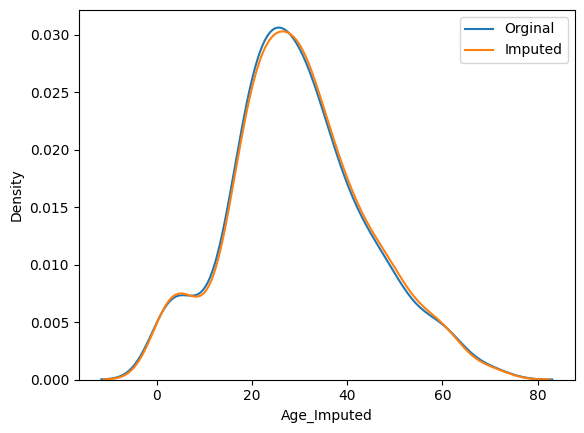

In [ ]:
sns.distplot(x_train['Age'],label='Orginal',hist=False)
sns.distplot(x_train['Age_Imputed'],label='Imputed',hist=False)
plt.legend()

In [ ]:
x_train['Age'].var()

204.3495133904614

In [ ]:
x_train['Age_Imputed'].var()

203.83639076075784

In [ ]:
x_train[['Fare','Age','Age_Imputed']].cov() #we can see covariance has changed

,Fare,Age,Age_Imputed
Fare,2368.246832,71.512440,49.925264
Age,71.512440,204.349513,204.349513
Age_Imputed,49.925264,204.349513,203.836391


<Axes: >

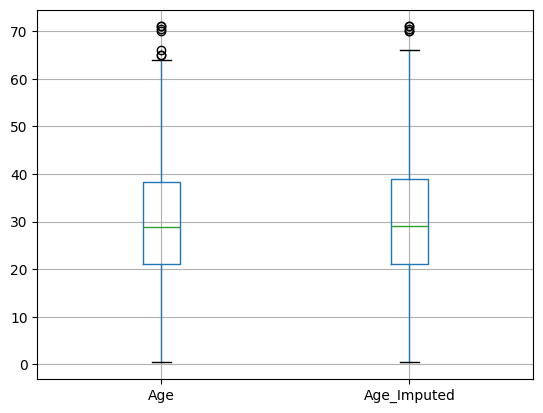

In [ ]:
x_train[['Age','Age_Imputed']].boxplot() #outliers stay same

In [ ]:
#problem here is this also that random can give random value for a single value
#when asked multiple time e.g if a person has age 60 it will give random number and if
#another person comes with same age it will assign it different so we do the below to give
#the same output for given input

#sampled_value = x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

In [ ]:
df = pd.read_csv('/content/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df.isnull().sum()

,0
FireplaceQu,690
GarageQual,81
SalePrice,0


In [ ]:
df.shape

(1460, 3)

In [ ]:
x = df
y = df['SalePrice']

In [ ]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train['GarageQual_Imputed'] = x_train['GarageQual']
x_test['GarageQual_Imputed'] = x_test['GarageQual']

x_train['FireplaceQu_Imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_Imputed'] = x_test['FireplaceQu']

In [ ]:
x_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_Imputed,FireplaceQu_Imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [ ]:
x_train['GarageQual_Imputed'][x_train['GarageQual_Imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_Imputed'][x_test['GarageQual_Imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_Imputed'][x_train['FireplaceQu_Imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_Imputed'][x_test['FireplaceQu_Imputed'].isnull()] = x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-1150522068.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['GarageQual_Imputed'][x_train['GarageQual_Imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
/tmp

In [ ]:
x_train.isnull().sum()

,0
FireplaceQu,557
GarageQual,65
SalePrice,0
GarageQual_Imputed,0
FireplaceQu_Imputed,0


In [ ]:
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_Imputed'].value_counts() / len(x_train)
    ],
    axis=1
)

temp.columns = ['original','imputed']

#frequency of both should remain same

In [ ]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [ ]:
temp = pd.concat(
    [
        x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_Imputed'].value_counts() / len(x_train)
    ],
    axis=1
)

temp.columns = ['original','imputed']

In [ ]:
temp

,original,imputed
Gd,0.494272,0.494007
TA,0.412439,0.412671
Fa,0.040917,0.040240
Po,0.027823,0.029110
Ex,0.024550,0.023973


/tmp/ipython-input-2330484123.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],label=category,hist=False)
/tmp/ipython-input-2330484123.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu']

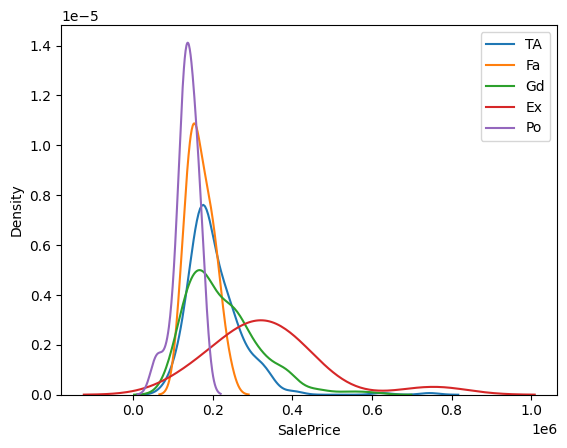

In [ ]:
for category in  x_train['FireplaceQu'].dropna().unique():
  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],label=category,hist=False)
plt.legend()


/tmp/ipython-input-3011090224.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_Imputed'] == category]['SalePrice'],label=category,hist=False)
/tmp/ipython-input-3011090224.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Firep

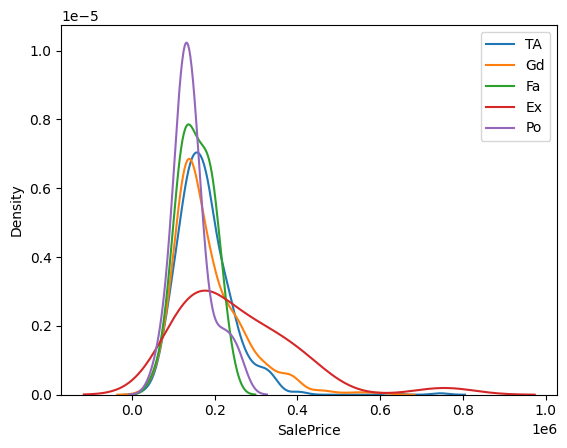

In [ ]:
for category in  x_train['FireplaceQu_Imputed'].dropna().unique():
  sns.distplot(x_train[x_train['FireplaceQu_Imputed'] == category]['SalePrice'],label=category,hist=False)
plt.legend()
